In [3]:
import cv2
import json 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import torch

from collections import defaultdict 

0.9534097909927368
0.30525004863739014
0.8371663093566895
0.5185420513153076
0.12558859586715698
0.7029367685317993
0.7589339017868042
0.16660097241401672
0.8598871827125549
0.7797198295593262
0.2782997488975525
0.75013267993927
0.6170101165771484
0.4799310863018036
0.9702644944190979
0.7991636991500854
0.7235875129699707
0.7419387698173523
0.49305182695388794
0.8611139059066772
0.8040519952774048
0.45470523834228516
0.583976686000824
0.8129664659500122
0.4627462923526764
0.7620506286621094
0.23063087463378906
0.5398677587509155
0.9281014800071716
0.8893568515777588
0.2633216381072998
0.6326549053192139
0.5598904490470886
0.19467177987098694
0.20219966769218445
0.42375415563583374
0.6665178537368774
0.5909087657928467
0.5048320889472961
0.5397616624832153
0.5163660049438477
0.9655888676643372
0.2648565173149109
0.8790163993835449
0.2967742681503296
0.3468031883239746
0.564176082611084
0.9053118228912354
0.8657468557357788
0.46370190382003784
0.48700204491615295
0.6259369254112244
0.837

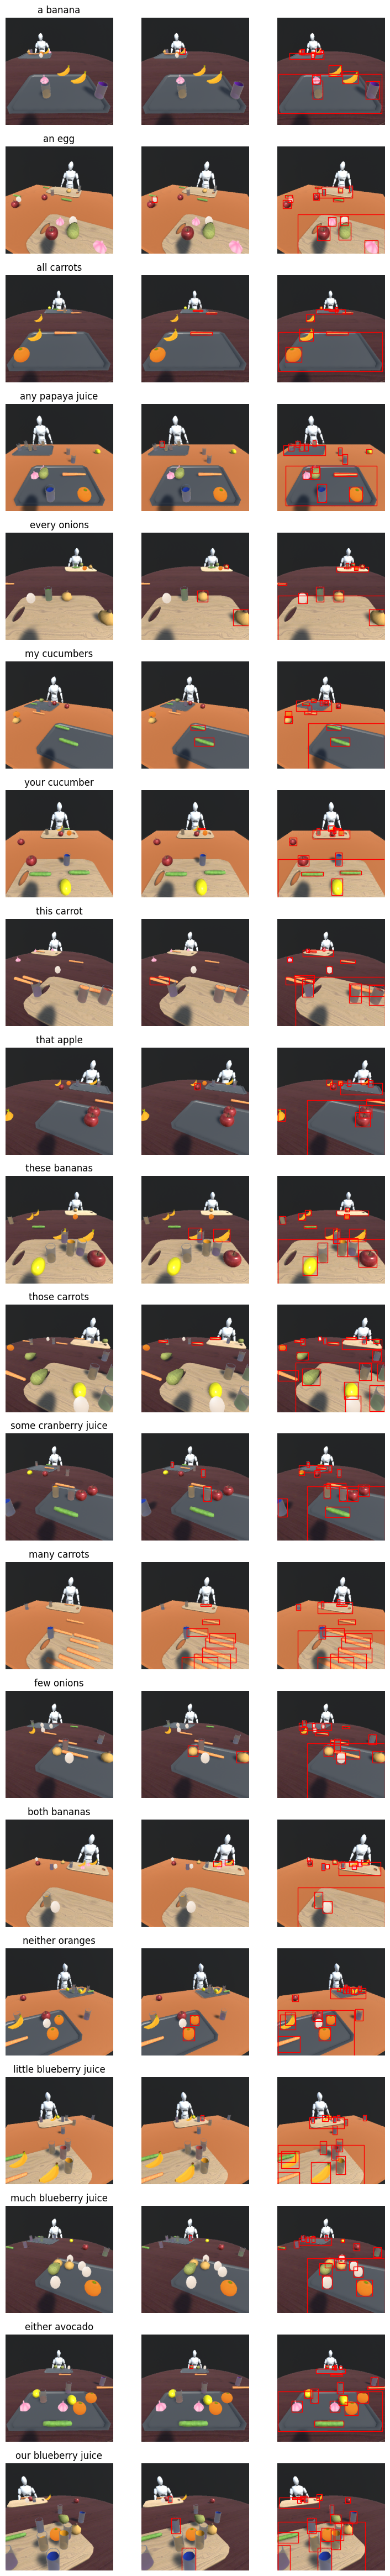

In [5]:
data_dir = "../DetermiNetProject/Assets/StreamingAssets/dataset"
annotations_dir = "../annotations"
annotations_filename = "annotations_val.json"

annotations = json.load(open(os.path.join(os.getcwd(), annotations_dir, annotations_filename), "rb"))

num_samples = 20 
start_id = 0 
step = 1000

anns_map = defaultdict(list)
oracle_anns_map = defaultdict(list)

for ann in annotations["annotations"]: 
    anns_map[ann["image_id"]].append(ann)
    
for ann in annotations["input_oracle_annotations"]:
    oracle_anns_map[ann["image_id"]].append(ann)

fig, ax = plt.subplots(num_samples,3, figsize=(9,num_samples*3))
for i, image in enumerate(annotations["images"][start_id: start_id+num_samples*step: step]):
    img_filepath = os.path.join(data_dir, image["file_name"])
    img = cv2.imread(img_filepath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_id = image["id"]
    caption = image["caption"]
    
    ax[i][0].set_title(caption)
    for j in range(3): 
        ax[i][j].imshow(img)
        ax[i][j].axis("off")
    img_anns = anns_map[img_id]
    oracle_anns = oracle_anns_map[img_id]
    
    for ann in img_anns: 
        x,y,w,h = ann["bbox"]
        rect = patches.Rectangle((x,y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax[i][1].add_patch(rect)
        
    for ann in oracle_anns: 
        x,y,w,h = ann["bbox"]
        rect = patches.Rectangle((x,y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax[i][2].add_patch(rect)
        if ann["liqLevel"] != -1: 
            print(ann["liqLevel"])
    
    plt.imshow(img)
    